In [ ]:
!pip install wikipedia-api
!pip install rouge-score
!pip install pandas
!pip install re
!pip install requests
!pip install beautifulsoup4
!pip install unicode
!pip install tabulate

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia-api: filename=Wikipedia_API-0.7.1-py3-none-any.whl size=14347 sha256=1ec97e6102cf2bbed11fb1c7d4166a921e98f3fa5d76cf1cdc5515ad9894c7c4
  Stored in directory: /root/.cache/pip/wheels/4c/96/18/b9201cc3e8b47b02b510460210cfd832ccf10c0c4dd0522962
Successfully built wikipedia-api
  Preparing metadata (setup.py) ... done
  Created wheel for rouge-score: filename=rouge_score-0.1.2-py3-none-any.whl size=24935 sha256=1f07aec4cd23541b6ac79b4d9c38a00d7449b76b700532bbcc453cb643edb416
  Stored in directory: /root/.cache/pip/wheels/5f/dd/89/461065a73be61a532ff8599a28e9beef17985c9e9c31e541b4
Successfully built rouge-score
ERROR: Could not find a version that satisfies the requirement re (from versions: none)
ERROR: No matching distribution found for re


In [ ]:
!pip install scikit-learn
!pip install matplotlib
!pip install wordcloud
!pip install nltk
!pip install plotly

In [ ]:
!pip install seaborn

In [ ]:
import wikipediaapi
from rouge_score import rouge_scorer
import pandas as pd
import re
import unicodedata
import requests
from bs4 import BeautifulSoup
from tabulate import tabulate
import textwrap
from transformers import pipeline

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import plotly
import json

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# User-Agent for Wikipedia API access done
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

!echo "HF_TOKEN=Your_Hugging_Face_access_token" >> /content/drive/MyDrive/.env

# Set your Hugging Face token
import os
os.environ['HF_TOKEN'] = 'Your_Hugging_Face_access_token'

Mounted at /content/drive


In [ ]:
# Initialize Wikipedia API with the correct user agent Done
wiki_wiki = wikipediaapi.Wikipedia(
    language='en',
    user_agent=user_agent
)

In [ ]:
# URL of the Wikipedia page
url = "https://en.wikipedia.org/wiki/New_7_Wonders_of_the_World"

# Send a GET request to the URL
response = requests.get(url)

In [ ]:
# Parse the HTML content of the page
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table in the "Winners" section
table = soup.find('table', {'class': 'wikitable'})

# Initialize an empty list to store the names of the wonders
wonders_dict = {}

In [ ]:
# Iterate over each row in the table (excluding the header row)
for row in table.find_all('tr')[2:]:
    # Get the first cell in the row (which contains the name of the wonder)
    cell = row.find_all('td')[0]
    # Get the text content of the cell and strip any leading/trailing whitespace
    wonder_name = cell.get_text(strip=True)
    # Get the URL of the wonder's Wikipedia page
    wonder_url = "https://en.wikipedia.org" + cell.find('a')['href']
    # Add the wonder name and URL to the dictionary
    wonders_dict[wonder_name] = wonder_url

In [ ]:
# Print the names of the wonders
print("New 7 Wonders of the World:")
# Print the dictionary containing the names and URLs of the wonders
print(wonders_dict)

New 7 Wonders of the World:
{'Great Wall of China': 'https://en.wikipedia.org/wiki/Great_Wall_of_China', 'Petra': 'https://en.wikipedia.org/wiki/Petra', 'Colosseum': 'https://en.wikipedia.org/wiki/The_Colosseum', 'Chichén Itzá': 'https://en.wikipedia.org/wiki/Chich%C3%A9n_Itz%C3%A1', 'Machu Picchu': 'https://en.wikipedia.org/wiki/Machu_Picchu', 'Taj Mahal': 'https://en.wikipedia.org/wiki/Taj_Mahal', 'Christ the Redeemer': 'https://en.wikipedia.org/wiki/Christ_the_Redeemer_(statue)'}


In [ ]:
# Reference summaries (Manually added)
reference_summaries = {
    "Great Wall of China": "The Great Wall of China is a series of fortifications built across the historical northern borders of ancient Chinese states and Imperial China to protect against various nomadic groups from the Eurasian Steppe. The wall stretches from Liaodong in the east to Lop Lake in the west, from the present-day Sino-Russian border in the north to the Tao River in the south, spanning 21,196 km (13,170.70 mi) in total. The Chinese character for city or fortress is a phonosemantic compound, and the longer name Ten-Thousand Mile Long Wall came from Sima Qian's description. The Great Wall became standard in English and French by the 19th century. The Chinese were familiar with wall-building techniques by the Spring and Autumn period (8th-5th century BC). The wall was built to withstand attacks from small arms like swords and spears.During the Ming era (14th century), the Great Wall concept was revived to keep nomadic tribes out by constructing walls along China's northern border. The wall followed the desert's southern edge instead of incorporating the Yellow River bend. The Liaodong Wall enclosed the agricultural heartland of Liaodong province, protecting it against potential incursions. Towards the end of the Ming dynasty, the Great Wall helped defend against the Manchu invasion around 1600. The wall is mentioned in travelogues and associated with legends in the Quran. After China's defeat in the Opium Wars, the Great Wall became a tourist attraction. In 2012, National Cultural Heritage Administration concluded that remaining Great Wall sites include 10,051 sections, 1,764 ramparts or trenches, 29,510 buildings, and 2,211 fortifications or passes, spanning a total length of 21,196 km (13,170.70 mi).The Ming dynasty's Great Wall cut through Ordos Desert to Yellow River's eastern edge. Outer Great Wall extends along Inner Mongolia border with Shanxi into Hebei province, while inner Great Wall runs southeast from Piantou Pass for about 400 km (250 mi). Badaling Great Wall near Zhangjiakou is most famous stretch, being first section opened to public. Shanhai Pass at Bohai Gulf's edge is considered traditional end of Great Wall. In 2009, 180 km of previously unknown sections of Ming Wall were discovered using infrared range finders and GPS devices. About 22% of Ming Great Wall has disappeared, and 1,961 km (1,219 mi) of wall have vanished. It is estimated that more than 60 km (37 mi) of wall in Gansu province may disappear in next 20 years due to erosion from sandstorms. In some places, wall's height has been reduced from over 5 m (16 ft 5 in) to less than 2 m (6 ft 7 in).The Great Wall of China cannot be seen by naked human eye from moon, a myth thoroughly debunked but still ingrained in popular culture. The apparent width of Great Wall would be same as human hair viewed from 3 km (2 mi) away. A Chinese-American astronaut took a photograph from International Space Station showing wall, reporting that from an orbit between 160 and 320 km (100 and 200 mi), Great Wall is visible to naked eye.",
    "Petra": "Petra, one of the New Seven Wonders of the World and a UNESCO World Heritage Site, is also known as the Rose City due to the color of the sandstone from which it is carved. The area around Petra has been inhabited since as early as 7000 BC and was settled by the Nabataeans, a nomadic Arab people, in the 4th century BC. Petra flourished in the 1st century AD when the Al-Khazneh structure, possibly the mausoleum of Nabataean King Aretas IV, was constructed. The city was hit hard by the COVID-19 pandemic but began to recover, reaching 905,000 visitors in 2022. By 7000 BC, some of the earliest recorded farmers had settled in Beidha, a pre-pottery Neolithic settlement just north of Petra. Bronze Age Petra is listed in Egyptian campaign accounts and the Amarna letters as Pel, Sela, or Seir. An old theory held that Petra might be identified with a place called Sela in the Hebrew Bible. The passage in Diodorus Siculus XIX.94-97 describes the expedition Antigonus sent against the Nabataeans in 312 BC, implying no town existed there at the time. It is possible that the city was part of the nation of Edom. Another Roman road was constructed at the site. In 130 AD, Hadrian visited the former Nabataean capital, giving it the name Hadrian Petra Metropolis, imprinted on his coin. The area from Petra to Wadi Mujib, the Negev, and the Sinai Peninsula were annexed into the province of Palaestina Salutaris. During the Byzantine period, Petra declined rapidly under Roman rule, largely due to the revision of sea-based trade routes. In 363, an earthquake destroyed many buildings and crippled the vital water management system. The last reference to Petra comes from the “Spiritual Meadow” of John Moschus, written in the first decade of the 7th century. The first European to describe Petra was the Swiss traveler Johann Ludwig Burckhardt during his travels in 1812. The first accurate drawing of Petra in 1828 was made by Léon de Laborde. Local folklore says it was created by the wand of Moses when he struck the rock to bring forth water for the Israelites. The Bedul Bedouin, once inhabitants of Petra, were relocated by the Jordanian government to the nearby settlement of Umm Sayhoun in the 1980s. Bedul Bedouin are believed to have adopted Islam later in their history, possibly with Jewish or Nabataean origins. Petra is known primarily for its Hellenistic architecture. The facades of the tombs in Petra are commonly rendered in Hellenistic style, reflecting the diverse cultures with which the Nabataeans traded, all of which were influenced by Greek culture. Perhaps the best example of this style is seen in the Treasury, which is 24 meters (79 ft) wide and 37 meters (121 ft) tall. The Monastery is 45 meters (148 ft) tall and 50 meters (160 ft) wide. The Treasury is the most elaborate ruin, popularly known as Al-Khazneh, hewn into the sandstone cliff. The face of the structure is marked by hundreds of bullet holes made by local Bedouin tribes hoping to dislodge riches rumored to be hidden within it. The Petra Pool and Garden Complex is a series of structures within the city center. The High Place of Sacrifice is perched atop Jebel Madbah mountain. The tomb of the prophet Aaron is believed to be located in Petra, which is a sacred site for Muslims. In honor of this, a goat was sacrificed annually, and other rituals took place there, including the burning of frankincense. Petra was the capital of the Nabataean Kingdom and the center of their caravan trade. The Nabataeans worshipped Arab gods and goddesses during the pre-Islamic era, as well as a few of their deified kings. A stele dedicated to Qos-Allah (Qos is Allah) is found at Petra. Allah, El, and Allat were gods and goddesses with regional references to Al-Uzza, Baal, and Manat. Allat is also found in Sinai in South Arabian language. Recently, Petra has been put forward as the original direction of Muslim prayer (the Qibla) by some, suggesting that the earliest mosques faced Petra, not Jerusalem or Mecca. Petra is the largest village in the region, inhabited largely by the Layathnah Bedouin. The Wadi Musa, or Wadi of Moses, is the Arabic name for the narrow valley at the head of which Petra is sited. The area has a semi-arid climate with an average annual temperature of 15.5°C (59.9°F). On December 6, 1985, Petra was designated a World Heritage Site. In a popular poll in 2007, it was also named one of the New Seven Wonders of the World. In 2011, following an 11-month project planning phase, the Petra Development and Tourism Region Authority published a strategic master plan. UNESCO and ICOMOS recently collaborated to publish their first book on human and natural threats to the sensitive World Heritage Site, choosing Petra as its first and most important example of a threatened landscape. The presentation “Tourism and Archaeological Heritage Management at Petra: Driver to Development or Destruction” (2012) was the first in a series to address the deteriorating buildings, city sites, and regions. An increasing number of Nabataean cultural heritage sites are being exposed to environmental impacts. A central issue is the management of water impacting the built heritage and the rock-hewn facades. In recent years, different conservation campaigns and projects have been established at the cultural heritage site of Petra. In 1845, British poet John William Burgon won Oxford University’s Newdigate Prize for his poem “Petra,” containing the description “… a rose-red city half as old as time.” Petra appeared in the novel “Bartleby Left Behind” (Left Behind series), “Appointment with Death,” “The Eagle in the Sand,” “The Red Sea Sharks” (the nineteenth book in the Adventures of Tintin series). Petra is central to Netflix’s first Arabic original series “Jinn,” a young adult supernatural drama about the djinn in the ancient city of Petra. A fictionalized version of Petra appears as a playable arena in the video game Overwatch, added in a 2018 update. The UNESCO World Heritage Centre refers to Petra as the Kingdom of Sifu. The Bedouin tribe of Petra was photographed between 1986 and 2003, and these photographs were retrieved in 2008. The people of the West are mentioned in the Weilue by Yu Huan. The American Center of Research is located in California, USA. It is the largest research center in the world and centers of research in the United States. It is the first of its kind in the country since it was founded in 1903.",
    "Christ the Redeemer": "Christ the Redeemer (Portuguese: Cristo Redentor) is an iconic Art Deco statue of Jesus Christ in Rio de Janeiro, Brazil. Designed by French-Polish sculptor Paul Landowski and built by Brazilian engineer Heitor da Silva Costa, with assistance from French engineer Albert Caquot, the statue’s face was created by Romanian sculptor Gheorghe Leonida. Constructed between 1922 and 1931, the statue stands 30 meters (98 feet) tall, excluding its 8-meter (26 feet) pedestal, and its arms stretch 28 meters (92 feet) wide. Made of reinforced concrete and soapstone, it is located at the peak of the 700-meter (2,300 feet) Corcovado mountain in the Tijuca National Park, overlooking Rio de Janeiro. Christ the Redeemer is a symbol of Christianity worldwide and a cultural icon of both Rio de Janeiro and Brazil. It was voted one of the New 7 Wonders of the World in 2007.",
    "Machu Picchu": "Machu Picchu, a 15th-century Inca citadel, is located in the Eastern Cordillera of southern Peru on a mountain ridge at 2,430 meters (7,970 ft). The Inca civilization had no written language, and after the first encounter by Spanish soldier Baltasar Ocampo, no Europeans are recorded to have visited the site from the late 16th century until the 19th century. The site is situated on a narrow saddle between two mountain peaks, Machu Picchu and Huayna Picchu. In Quechua, “machu” means old or old person, and “wayna” means young, while “pikchu” refers to a summit, peak, or pyramid. The name of the site is often translated as “old mountain” or “old peak.” Studies show that, according to their skeletal remains, most people who lived there were immigrants from diverse backgrounds. The estate belonged to Pachacutec, and religious specialists and temporary specialized workers (mayocs) lived there permanently. During harsher seasons, staffing was reduced to a few hundred servants and a few religious specialists focused solely on maintenance. Much of the farming at Machu Picchu was done on its hundreds of andenes (man-made terraces). These terraces were a work of engineering, built to ensure good drainage and soil fertility while also protecting the mountain itself from erosion and landslides. The terrace farming area makes up only about 4.9 hectares (12 acres) of land. The site may have been rediscovered and plundered in 1867 by a German businessman, Augusto Berns. Over the centuries, the surrounding jungle overgrew the site, and few outside the immediate area knew of its existence. The name believed to be originally given to the site by locals was found by explorer Agustín Lizárraga, who wrote the date 1902 in charcoal on one of the walls of the Temple of the Three Windows. In 1952, Hiram Bingham claimed to have found the site himself. Though Bingham was not the first to visit the ruins, he is considered the scientific discoverer who brought Machu Picchu to international attention. Bingham rediscovered and correctly identified the site of the old Inca capital, Vitcos (then called Rosaspata), and the nearby temple of Chuquipalta. In 1964, Gene Savoy further explored the ruins at Espiritu Pampa and revealed the full extent of the site, identifying it as Vilcabamba. Bingham returned to Machu Picchu in 1912 under the sponsorship of Yale University and National Geographic, with the full support of Peruvian President Augusto Leguía. The expedition undertook a four-month clearing of the site with local labor, expedited with the support of the prefect of Cusco. During his study, Bingham carried various artifacts back to Yale. In 1983, UNESCO designated Machu Picchu a World Heritage Site, describing it as a masterpiece of art, urbanism, architecture, and engineering, and a unique testimony to the Inca civilization. The site is also a habitat for more than 420 bird species, notably the cock-of-the-rock and the Andean condor. UNESCO considered including Machu Picchu on its list of World Heritage in Danger in 2017 but ultimately decided against it. In January 2010, severe flooding caused by El Niño trapped over 4,000 people and disrupted access to the site. Stricter entrance regulations were introduced in July 2011, limiting the number of daily visitors to 2,500 to the citadel and 400 to Huayna Picchu. Machu Picchu lies in the Southern Hemisphere, 13.111 degrees south of the equator. It is located 80 kilometers (50 miles) northwest of Cusco on the crest of the mountain. The location of the city was a military secret, and its deep precipices and steep mountains provided natural defense. Machu Picchu and other sites in the area are built over earthquake faults. According to research conducted in 2019, this may not be a coincidence. Research suggests that the earthquake faults provided building material for the site, with large amounts of already fractured rock readily available. Located in the urban sector are the primary archaeological treasures and tourist attractions: the Intihuatana, the Temple of the Sun, and the Popular District or Residential District, where the lower-class people lived. The Royal Mausoleum is a carved statue with a vaulted interior and carved drawings. The Guardhouse is a three-sided building with one of its long sides opening onto the terrace of the Ceremonial Rock. The Intihuatana stone is a ritual stone designed to point directly at the sun during the winter solstice. The Inca believed the stone held the sun in its place along its annual path in the sky. Inti Machay is a special cave used to observe the royal feast of the sun. Inti Machay is located on the eastern side of Machu Picchu, just north of the Condor Stone. Many of the caves surrounding this area were prehistorically used as tombs, yet there is no evidence that Machay was a burial ground. Disputes over cultural artifacts arose when, in 1912, 1914, and 1915, Bingham removed thousands of artifacts from Machu Picchu. Yale kept the artifacts until 2012, arguing that Peru lacked the infrastructure and systems to care for them. Machu Picchu may have been intentionally built on fault lines to provide natural drainage and a source of fractured stone for construction. The Inca civilization was an empire of fractured rock. The section of the mountain where Machu Picchu was built provided various challenges that the Inca solved with local materials. The Inca Trail is considered the most famous hike in South America by Lonely Planet, attracting thousands of tourists each year. The people of Machu Picchu were connected to long-distance trade, as shown by non-local artifacts found at the site. The most popular option is the train journey from Cusco or Ollantaytambo. Machu Picchu featured prominently in the film “The Motorcycle Diaries” (2004), based on the memoirs of Marxist revolutionary Che Guevara. It was the first time a major Hollywood studio filmed on site. Five hundred indigenous people were hired as extras for the film “Secret of the Incas” (1954).",
    "Chichén Itzá": "Chichén Itzá, often spelled Chichen Itza in English and traditional Yucatec Maya, was a large pre-Columbian city built by the Maya people of the Terminal Classic period. The site exhibits a multitude of architectural styles reminiscent of styles seen in central Mexico and of the Puuc and Chenes styles of the northern Maya lowlands. Chichén Itzá is located in the eastern portion of Yucatán state in Mexico. The name, dating to the Late Classic period, is recorded both in the Book of Chilam Balam de Chumayel and in hieroglyphic texts in the ruins. Archaeologists in the late 1980s suggested that, unlike previous Maya polities of the Early Classic, Chichén Itzá may not have been governed by an individual ruler or a single dynastic lineage. Instead, the city’s political organization could have been structured by a multepal system, characterized by rulership through a council composed of members of elite ruling lineages. This theory was popular in the 1990s, but in recent years, the research that supported the concept has been called into question, if not discredited. The earliest hieroglyphic date discovered at Chichén Itzá is equivalent to 832 AD, while the last known date was recorded in the Osario Temple in 998. However, it was toward the end of the Late Classic and into the early part of the Terminal Classic that the site became a major regional capital, centralizing and dominating political, sociocultural, economic, and ideological life in the northern Maya lowlands. Archaeological data now indicates Chichén Itzá declined as a regional center by 1100, before the rise of Mayapan. After Chichén Itzá’s elite activity ceased, the city may not have been abandoned. When the Spanish arrived, they found a thriving local population. The relatively high population density in the region was a factor in the conquistadors’ decision to locate a capital there. The Cenote Sagrado remained a place of pilgrimage. Chichén Itzá entered the popular imagination in 1843 with the book “Incidents of Travel in Yucatan” by John Lloyd Stephens, with illustrations by Frederick Catherwood. The Spanish crown later issued a land grant that included Chichén Itzá, and by 1588 it was a working cattle ranch. In 1875, Augustus Le Plongeon excavated a statue of a figure on its back, knees drawn up, upper torso with a plate on its stomach. In 1913, the Carnegie Institution accepted the proposal of archaeologist Sylvanus G. Morley and committed to conducting long-term archaeological research at Chichén Itzá. The Mexican Revolution and the following government instability, as well as World War I, delayed the project by a decade. In 1926, the Mexican government charged Edward Thompson with theft, claiming he stole artifacts from the Cenote Sagrado and smuggled them out of the country. Chichén Itzá is one of the largest Maya cities, with the relatively densely clustered architecture of the site core covering an area of at least 5 square kilometers. The architecture encompasses a number of styles, including the Puuc and Chenes styles of the northern Yucatán Peninsula. The buildings were connected by a dense network of paved causeways called sacbeob. The Temple of Kukulcán (El Castillo) is the temple of a Maya feathered serpent deity similar to the Aztec Quetzalcoatl. The Puuc-style architecture is concentrated in the Old Chichen area and also the earlier structures in the Nunnery Group. Mesoamerican cultures periodically superimposed larger structures over older ones, and the Temple of Kukulcán is one such example. In the mid-1930s, the Mexican government sponsored an excavation of the temple. After several false starts, they discovered a staircase under the north side of the pyramid. By digging from the top, they found another temple buried below the current one. Inside the temple chamber was a Chac Mool statue and a throne in the shape of a jaguar, painted red and with spots made of jade. At one end of the Great Ball Court is the North Temple, also known as the Temple of the Bearded Man (Templo del Hombre Barbado). At the south end is another, much bigger temple, but in ruins. Built into the east wall are the Temple of the Jaguar. The Platform of the Eagle and the Jaguar (Plataforma de Águilas y Jaguares) is immediately to the east of the Great Ballcourt. It is built in a combination of Maya and Toltec styles. The Temple of the Table is located north of El Castillo, between it and the Cenote Sagrado. The Yucatán Peninsula is a limestone plain with no rivers or streams. The region is pockmarked with natural sinkholes called cenotes, which expose the water table to the surface. The Temple of the Warriors complex consists of a large stepped pyramid fronted and flanked by rows of carved columns depicting warriors. This complex is analogous to Temple B at the Toltec capital of Tula and indicates some form of cultural contact between the two regions. At the southeast corner of the Temple of the Warriors is a rectangular structure decorated with carvings of people or gods, as well as animals and serpents. The Northeast Column Temple also covers a small marvel of engineering: a channel that funnels all the rainwater from the complex some 40 meters (130 ft) away to a rejollada, a former cenote. The Temple of Xtoloc is a recently restored temple outside the Osario platform. It overlooks the other large cenote at Chichén Itzá, named after the Maya word for iguana. The temple contains a series of pilasters carved with images of people, as well as representations of plants, birds, and mythological scenes. The Central Group (Las Monjas) is one of the more notable structures at Chichén Itzá. It is a complex of Terminal Classic buildings constructed in the Puuc architectural style. One building is half-standing, named La Casa del Venado (House of the Deer). Another is a small temple known as La Iglesia (The Church), decorated with elaborate masks. Old Chichen, or Chichén Viejo in Spanish, is the name given to a group of structures to the south of the central site, where most of the Puuc-style architecture of the city is concentrated. This section of the site has been closed to tourism for years while archaeological excavation and restoration were ongoing and is planned to reopen to visitors in 2024. In the caves, a large selection of ancient pottery and idols may be seen still in the positions where they were left in pre-Columbian times. Chichén Itzá is one of the most visited archaeological sites in Mexico. In 2017, it was estimated to have received 2.1 million visitors. Tourism has been a factor at the site for more than a century. John Lloyd Stephens popularized the Maya Yucatán in the public imagination with his book “Incidents of Travel in Yucatan,” which inspired many to make a pilgrimage to Chichén Itzá. In the mid-1920s, Barbachano Peon persuaded Edward Thompson to sell 5 acres (20,000 m²) next to Chichén Itzá for a hotel. In 1930, the Mayaland Hotel opened just north of the Hacienda Chichén, which had been taken over by the Carnegie Institution. In 1944, Barbachano Peon purchased all of Chichén Itzá from the heirs of Edward Thompson. In 1972, Mexico enacted the Ley Federal sobre Monumentos y Zonas Arqueológicas, Artísticas e Históricas (Federal Law over Monuments and Archaeological, Artistic, and Historic Sites). Today, several thousand people show up to see the light-and-shadow effect on the Temple of Kukulcán. In 2007, Chichén Itzá’s Temple of Kukulcán (El Castillo) was named one of the New Seven Wonders of the World after a worldwide vote. INAH, which manages the site, has closed a number of monuments to public access. The state of Yucatán purchased the land upon which the most recognized monuments rest from owner Hans Juergen Thies Barbachano. UNESCO has a page about Chichén Itzá as a World Heritage Site. The ancient observatory page on Chichén Itzá has been reconstructed in 3D. Archaeological documentation for Chichén Itzá has been created by the nonprofit group Insight and funded by the National Science Foundation.",
    "Colosseum": "The Colosseum is an elliptical amphitheatre in the center of Rome, Italy, just east of the Roman Forum. Construction began under Emperor Vespasian in AD 72 and was completed in AD 80 under his successor and heir, Titus. It could hold an estimated 50,000 to 80,000 spectators at various points in its history, with an average audience of around 65,000. The name “Colosseum” is believed to be derived from a colossal statue of Nero, modeled after the Colossus of Rhodes. The name is a neuter Latin noun formed from the adjective “colosseus,” meaning gigantic. By the year 1000, the Latin name had been coined to refer to the amphitheatre from the nearby Colossus Solis. The spellings “Colosseum” and “Coliseum” are attested from the 12th and 14th centuries, respectively. Early citations for the name “Colosseum” in early modern English include the 1600 translation by Philemon Holland of the “Urbis Romae Topographia” of Bartolomeo Marliani, which he used in preparing his translation of Livy’s “Ab Urbe Condita Libri.” After Nero’s suicide, the statue was remodeled by his successor into the likeness of Helios (Sol) or Apollo, the sun god, by adding the appropriate solar crown. The Colosseum was built on the site of Nero’s lake in the 2nd century BC. The site was devastated by the Great Fire of Rome in AD 64, after which Nero seized much of the area to add to his personal domain. He built the grandiose Domus Aurea, in front of which he created an artificial lake surrounded by pavilions, gardens, and porticoes. The lake was filled in, and the land was reused as the location for the new Flavian Amphitheatre. Construction of the Colosseum began under Vespasian around AD 70-72 and was completed up to the third story by the time of his death in AD 79. The top level was finished by his son Titus in AD 80, and the inaugural games were held in AD 80 or 81. The Colosseum continued to be used for contests well into the 6th century. The arena was used for animal hunts until at least AD 523, when Anicius Maximus celebrated his consulship with some venationes, criticized by King Theodoric the Great for their high cost. By the late 6th century, a small chapel had been built into the structure of the amphitheatre, though this did not confer any particular religious significance on the building as a whole. Pope Sixtus V (1585-1590) planned to turn the Colosseum into a wool factory to provide employment for Rome’s prostitutes. In 1671, Cardinal Altieri authorized its use for bullfights, but public outcry caused the idea to be hastily abandoned. In 1749, Pope Benedict XIV endorsed the view that the Colosseum was a sacred site where early Christians had been martyred. Later popes initiated various stabilization and restoration projects, removing the extensive vegetation that had overgrown the structure. The Colosseum was illuminated in gold in November 2012 following the abolition of capital punishment in the American state of Connecticut in April 2012. Since that time, as a gesture against the death penalty, the local authorities of Rome change the color of the Colosseum’s nighttime illumination from white to gold whenever a person condemned to the death penalty anywhere in the world has their sentence commuted or is released. The surviving part of the outer wall’s monumental façade comprises three superposed stories surmounted by a podium on which stands a tall attic, both of which are pierced by windows interspersed at regular intervals. The northern main entrance was reserved for the Roman emperor and his aides, while the other three axial entrances were most likely used by the elite. The amphitheatre was ringed by eighty entrances at ground level, 76 of which were used by ordinary spectators. Interior seating, according to the Codex-Calendar of 354, could accommodate 87,000 people, although modern estimates put the figure at around 50,000. Spectators were given tickets in the form of numbered pottery shards, which directed them to the appropriate section and row. They accessed their seats via vomitoria (singular: vomitorium), passageways that opened into a tier of seats from below or behind. These quickly dispersed people into their seats and, upon conclusion of the event or in an emergency evacuation, could permit their exit within only a few minutes. The hypogeum was a two-level subterranean network of tunnels and cages beneath the arena where gladiators and animals were held before contests began. It comprised a wooden floor covered by sand and included a gallery for the common poor, slaves, and women. The arena itself was 83 meters by 48 meters (272 ft by 157 ft). There is evidence for the existence of major hydraulic mechanisms, and according to ancient accounts, it was possible to flood the arena rapidly via a connection to a nearby aqueduct. However, the construction of the hypogeum at Domitian’s behest put an end to the practice of flooding and naval battles early in the Colosseum’s existence. Another major attraction was the animal hunts (venatio), which utilized a great variety of wild beasts, mainly imported from Africa and the Middle East. During lunch intervals, executions ad bestias would be staged. Those condemned to death would be sent into the arena naked and unarmed to face the beasts, which would literally tear them to pieces. Acrobats and magicians would also perform during the intervals. The Colosseum is the site of Roman Catholic ceremonies in the 20th and 21st centuries. A network of subterranean passageways that were once used for transporting wild animals and gladiators to the arena opened to the public in summer 2010. The Colosseum is generally regarded by Christians as a site of the martyrdom of a large number of believers during the persecution of Christians in the Roman Empire. Since November 1, 2017, the top two levels have been opened for guided visits. The fourth level held the marketplace, and the top fifth tier is where the poorest citizens, the plebeians, gathered and watched the shows, bringing picnics for the day-long events. The Colosseum has a wide and well-documented history of flora ever since Domenico Panaroli made the first catalog of its plants in 1643. Every Good Friday, the Pope leads a Via Crucis procession to the amphitheatre. Forty-two species have been counted today, and of the species first identified by Panaroli, 200 remain. The variation of plants can be explained by the change of climate in Rome through the centuries. The Colosseum has appeared in numerous films, artworks, and games. It is featured in films such as “Roman Holiday,” “Gladiator,” “The Way of the Dragon,” and “Jumper.” It is an open-air venue, the Stadium of Domitian, an ancient Roman stadium, and a landmark of Rome, Italy. References, bibliography, and external links include the official website, a virtual tour of the Colosseum, and a 3D model of the past and present of the site.",
    "Taj Mahal": "The Taj Mahal is an ivory-white marble mausoleum on the right bank of the river Yamuna in Agra, Uttar Pradesh, India. It was commissioned in 1631 by the fifth Mughal emperor Shah Jahan (r. 1628–1658) to house the tomb of his beloved wife Mumtaz Mahal. The tomb is the centerpiece of a 17-hectare (42-acre) complex, which includes a mosque and a guest house. The name “Taj Mahal” is of Urdu origin and is believed to be derived from Arabic and Persian, with “Taj” meaning crown and “Mahal” meaning palace. Construction started in 1632, and the mausoleum was completed in 1648, while the surrounding buildings and garden were finished five years later. The entire complex sits on a platform measuring 300 meters (980 ft) in length and 8.7 meters (28.5 ft) in height on the bank of the Yamuna river. The mausoleum building is the central structure of the entire complex. Each side of the iwan is framed with a 33-meter (108 ft) high pishtaq (vaulted archway). Four minarets flank the tomb building, one at each corner of the plinth, facing the chamfered corners. The main and smaller domes are decorated with a design resembling a lotus flower. The domes are topped by decorative finials, which are topped by a moon, a typical Islamic motif whose horns point heavenward. The dome and vault of the sandstone building are worked with tracery of incised painting to create elaborate geometric forms. The building has many lattice windows or jalis with interlocking hexagonal patterns. The gateway arches are bordered by Arabic calligraphy with passages from the Quran. The main chamber houses the false sarcophagi of Mumtaz Mahal and Shah Jahan, while the real ones are in the basement. The interior walls are about 25 meters (82 ft) high and are topped by a false interior dome decorated with a sun motif. The inlay work is a lapidary of precious and semi-precious gemstones. Mumtaz’s cenotaph is located in the exact center of the chamber on a marble base of 1.5 by 2.5 meters (4 ft 11 in by 8 ft 2 in). The cenotaphs are aligned north-south, with the head towards the north and the body laid on their sides with the face turned towards the west, facing Mecca. The original tomb in the lower level is largely undecorated, with ninety-nine names of God inscribed on the sides. The Charbagh garden, a design inspired by Persian gardens introduced to India by Babur, the first Mughal emperor, symbolizes the paradise garden (Jannah) with four rivers flowing from a central spring or mountain, separating the garden into north, west, south, and east. In the northwestern quadrant is a place that marks the site where Mumtaz Mahal was first buried before her body was moved to its final resting place inside the main chamber of the mausoleum. The Taj Mahal complex is enclosed by crenellated red sandstone walls on three sides, with the side facing the Yamuna river left open. As the Mughal Empire declined, the gardens were not maintained, and when the British Raj assumed management of the gardens, they changed the landscaping to resemble the formal lawns of London in the 19th century. The tomb complex was commissioned in 1631, and construction commenced in 1632. It is believed that more than 20,000 artisans, laborers, painters, and others were involved in the construction of the tomb. The external surface of the main tomb building and the interior of the main cenotaph chamber are veneered with white marble. The other interior surfaces and other interior buildings are lined with red sandstone coated with a red ochre for protection. The Taj Mahal complex is believed to have been completed in its entirety in 1653 at a cost estimated at the time to be around 5 million rupees, which in 2023 would be approximately 35 billion rupees (US$77.8 million). The first ceremony was held at the mausoleum by Shah Jahan on 6 February 1643, on the 12th anniversary of the death of Mumtaz Mahal. In 1983, the Taj Mahal was designated a UNESCO World Heritage Site for being the jewel of Islamic art in India and one of the universally admired masterpieces of world heritage. Since the late 20th century, the monument has been affected by environmental pollution, which has turned the tomb yellow-brown. The government of India has undertaken various restoration measures, including placing mud packs to restore the white color and replacing broken marble. The planning and structure of the Taj Mahal, from the building itself to the garden and beyond, is symbolic of Mumtaz Mahal’s mansion in the garden of paradise. The structure is decorated with colorful relief and semi-precious stones using a technique called parchin kari, symbolizing grandeur. The building appears to slightly change color depending on the time of day and the weather. This effect is due to the marble surface reacting to light and moisture, creating a magical and ever-changing visual experience. The Taj Mahal also appears in several listings of the Seven Wonders of the Modern World. The complex is open every day except Friday, from one hour before sunrise to 45 minutes before sunset. The small town to the south of the Taj, known as Taj Ganji or Mumtazabad, was initially constructed with caravanserais, bazaars, and markets. A more credible theory for the origin of the black mausoleum was demonstrated in 2006 by archaeologists who reconstructed part of the pool in the Mehtab Bagh. Some stories claim that those involved in the construction signed contracts committing themselves to have no part in any similar design. No evidence exists for the claim that Lord Bentinck, Governor-General of India in the 1830s, planned to demolish the Taj Mahal and auction off the marble. In August 2017, the Archaeological Survey of India declared that there was no evidence to suggest the monument ever housed a temple. The theory that it was a temple was first promoted by Henry George Keene in 1879. Keene went by a translation of a Spanish work, “Itinerario,” the travel of Fray Sebastian Manrique (1629–1643). Another theory that a Frenchman named Austin of Bordeaux designed the Taj Mahal was revived by Father Hosten and discussed again by E. B. Havell."
}

In [ ]:
# Function to remove accents from wonder names to match Wikipedia page titles
def remove_accents(text):
    return ''.join(c for c in unicodedata.normalize('NFD', text) if unicodedata.category(c) != 'Mn')

In [ ]:
# Clean and trim the Wikipedia summaries for better comparison
def clean_summary(text):
    # Remove brackets, special characters, and extra spaces
    text = re.sub(r'\[.*?\]', '', text)  # Remove bracketed text like "[edit]"
    text = re.sub(r'[^A-Za-z0-9 ,.]+', ' ', text)  # Remove non-alphanumeric characters
    return text.strip()

In [ ]:
# Function to wrap text to a specific width
def wrap_text(text, width=40):
    return '\n'.join(textwrap.wrap(text, width=width))

In [ ]:
# Initialize the summarization pipeline with a specific model
summarizer = pipeline("summarization", model="sshleifer/distilbart-cnn-12-6")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.80k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
results = []

In [ ]:
#data = wiki_wiki.page("Petra")
#print(data.text)

In [ ]:
#print(clean_summary(data.text))

In [ ]:
# 1. Cleaning: Remove noise such as HTML tags, special characters, and stop words
def clean_text(text):
    text = re.sub(r'<.*?>', '', text)  # Remove HTML tags
    text = re.sub(r'[^a-zA-Z0-9\s.]', '', text)  # Remove special characters except full stops
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra whitespace
    return text

In [ ]:
#2. Normalization: Convert text to lowercase, handle contractions, and perform stemming or lemmatization
def normalize_text(text):
    text = text.lower()
    contractions = {
        "don't": "do not",
        "can't": "cannot",
        "won't": "will not",
        "i'm": "i am",
        "it's": "it is",
        "he's": "he is",
        "she's": "she is",
        "they're": "they are",
        "we're": "we are",
        "you're": "you are",
        "i've": "i have",
        "you've": "you have",
        "we've": "we have",
        "they've": "they have",
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "hasn't": "has not",
        "haven't": "have not",
        "hadn't": "had not",
        "doesn't": "does not",
        "don't": "do not",
        "didn't": "did not",
        "won't": "will not",
        "wouldn't": "would not",
        "shan't": "shall not",
        "shouldn't": "should not",
        "mightn't": "might not",
        "mustn't": "must not"
    }
    for contraction, full_form in contractions.items():
        text = text.replace(contraction, full_form)

    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(text)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]

    return ' '.join(lemmatized_words)

In [ ]:
# 3. Tokenization: Split text into individual words or tokens
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

In [ ]:
# To store the text of extracted Wikkipedia Pages, Number of Tokens of Source Text and Wikkipedia Summary
Wikki_Text={}
Source_Tokens={}
Wikipedia_Summary_Tokens={}

In [ ]:
def summarize_large_text(text, chunk_size=2000, max_length=150, min_length=50):
    # Split the text into chunks
    chunks = [text[i:i + chunk_size] for i in range(0, len(text), chunk_size)]

    # Summarize each chunk
    summaries = []
    for chunk in chunks:
        summary = summarizer(chunk, max_length=max_length, min_length=min_length, do_sample=False)[0]['summary_text']
        summaries.append(summary)

    # Combine the summaries into a single summary
    combined_summary = ' '.join(summaries)
    return combined_summary

In [ ]:
for wonder, url in wonders_dict.items():
    # Normalize the wonder name to remove accents for Wikipedia page query
    normalized_wonder = remove_accents(wonder)

    # Fetch Wikipedia page
    page = wiki_wiki.page(normalized_wonder.replace(' ', '_'))

    #Storing the Extracted Text in a List after Cleaning and Noramalizing it
    cleaned_text = clean_text(page.text)
    normalized_text = normalize_text(cleaned_text)
    Wikki_Text[wonder]=normalized_text
    tokens_source=tokenize_text(normalized_text)
    Source_Tokens[wonder] = len(tokens_source)  # Calculate the number of tokens of Source Text

    if page.exists():
        # Use the summarization model to get a better summary
        wikipedia_summary = summarize_large_text(normalized_text, chunk_size=2000, max_length=150, min_length=50)
        wikipedia_summary = clean_summary(wikipedia_summary)  # Clean the summary
        tokens_summary=tokenize_text(wikipedia_summary)
        Wikipedia_Summary_Tokens[wonder]=len(tokens_summary) # Number of tokens in the Wikipedia Summary
    else:
        wikipedia_summary = "Page not found"

    # Get reference summary
    reference_summary = reference_summaries.get(wonder, "No reference summary available")

    # Calculate ROUGE scores if the Wikipedia page exists
    if wikipedia_summary != "Page not found":
        scores = scorer.score(wikipedia_summary, reference_summary)
        rouge1 = scores['rouge1'].fmeasure
        rouge2 = scores['rouge2'].fmeasure
        rougeL = scores['rougeL'].fmeasure
    else:
        rouge1, rouge2, rougeL = 0.0, 0.0, 0.0

    # Append results to the list, wrapping text
    results.append({
        'Wonder': wonder,
        'Source Text': wrap_text(page.text[:3000]),  # Wrap source text
        'Wikipedia Summary': wrap_text(wikipedia_summary),  # Wrap Wikipedia summary
        'Reference Summary': wrap_text(reference_summary),  # Wrap reference summary
        'ROUGE-1': rouge1,
        'ROUGE-2': rouge2,
        'ROUGE-L': rougeL
    })

Your max_length is set to 150, but your input_length is only 7. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=3)
Your max_length is set to 150, but your input_length is only 95. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=47)
Your max_length is set to 150, but your input_length is only 59. Since this is a summarization task, where outputs shorter than the input are typically wanted, you might consider decreasing max_length manually, e.g. summarizer('...', max_length=29)


In [ ]:
#print(Wikki_Text['Christ the Redeemer'])

In [ ]:
#print(Source_Tokens)
print(Wikipedia_Summary_Tokens)

{'Great Wall of China': 794, 'Petra': 1190, 'Colosseum': 1230, 'Chichén Itzá': 1388, 'Machu Picchu': 1043, 'Taj Mahal': 1127, 'Christ the Redeemer': 53}


In [ ]:
# Create DataFrame for the results
df = pd.DataFrame(results)
print(df)

                Wonder                                        Source Text  \
0  Great Wall of China  The Great Wall of China (traditional\nChinese:...   
1                Petra  Petra (Arabic: ٱلْبَتْراء, romanized:\nAl-Batr...   
2            Colosseum  The Colosseum ( KOL-ə-SEE-əm; Italian:\nColoss...   
3         Chichén Itzá  Chichén Itzá (often spelled Chichen Itza\nin E...   
4         Machu Picchu  Machu Picchu is a 15th-century Inca\ncitadel l...   
5            Taj Mahal  The Taj Mahal ( TAHJ mə-HAHL, TAHZH -⁠,\nHindi...   
6  Christ the Redeemer  Christ the Redeemer, a reference to\nJesus Chr...   

                                   Wikipedia Summary  \
0  The great wall of china is a series of\nfortif...   
1  petra is one of the new 7 wonder of the\nworld...   
2  The colosseum is an elliptical\namphitheatre i...   
3  chichn itz often spelled chichen itza in\nengl...   
4  machu picchu is a 15thcentury inca\ncitadel lo...   
5  the taj mahal is an ivorywhite marble\nmauso

In [ ]:
#print(df.loc[df['Wonder'] == "Taj Mahal", 'Wikipedia Summary'].values[0]) prints summary of a particular wonder

In [ ]:
# Display the DataFrame with borders using tabulate
print(tabulate(df, headers='keys', tablefmt='grid'))

+----+---------------------+--------------------------------------------------+------------------------------------------+------------------------------------------+-----------+-----------+-----------+
|    | Wonder              | Source Text                                      | Wikipedia Summary                        | Reference Summary                        |   ROUGE-1 |   ROUGE-2 |   ROUGE-L |
+====+=====================+==================================================+==========================================+==========================================+===========+===========+===========+
|  0 | Great Wall of China | The Great Wall of China (traditional             | The great wall of china is a series of   | The Great Wall of China is a series of   |  0.738794 | 0.527864  |  0.693972 |
|    |                     | Chinese: 萬里長城; simplified Chinese: 万里长城; | fortification that were built across the | fortifications built across the          |           |           |           

In [ ]:
# Optionally, you can save the table to a CSV file
#df.to_csv("seven_wonders_rouge_scores.csv", index=False)

In [ ]:
import seaborn as sns
from collections import Counter
from IPython.display import display
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
def fetch_source_text(wonder_name):
    return Wikki_Text[wonder_name]

In [ ]:
def generate_ngrams(text, n):
    words = re.findall(r'\b\w+\b', text.lower())
    return Counter(tuple(words[i:i+n]) for i in range(len(words) - n + 1))

In [ ]:
def plot_word_cloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 6))  # Increased height for more space
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud", fontsize=16, pad=20)  # Added padding to the title
    plt.tight_layout()
    plt.subplots_adjust(top=0.85)  # Adjust to add more space above
    plt.show()

In [ ]:
def ngram_analyze_wonder(wonder_name):
    # Fetch the source text
    source_text = fetch_source_text(wonder_name)

    # Generate unigrams, bigrams, and trigrams
    unigrams = generate_ngrams(source_text, 1)
    bigrams = generate_ngrams(source_text, 2)
    trigrams = generate_ngrams(source_text, 3)

    # Convert to DataFrames
    unigram_df = pd.DataFrame(unigrams.items(), columns=['Unigram', 'Frequency'])
    bigram_df = pd.DataFrame(bigrams.items(), columns=['Bigram', 'Frequency'])
    trigram_df = pd.DataFrame(trigrams.items(), columns=['Trigram', 'Frequency'])

    # Format unigram, bigram, and trigram columns
    unigram_df['Unigram'] = unigram_df['Unigram'].apply(lambda x: ' '.join(x))
    bigram_df['Bigram'] = bigram_df['Bigram'].apply(lambda x: ' '.join(x))
    trigram_df['Trigram'] = trigram_df['Trigram'].apply(lambda x: ' '.join(x))

    # Display tables
    print("Top Unigrams:")
    display(unigram_df.nlargest(10, 'Frequency'))

    print("Top Bigrams:")
    display(bigram_df.nlargest(10, 'Frequency'))

    print("Top Trigrams:")
    display(trigram_df.nlargest(10, 'Frequency'))

    # Visualization: Interactive Bar charts using Plotly
    def plot_frequency(df, title, ngram_type):
        fig = px.bar(df.head(10), x='Frequency', y=ngram_type, title=title, orientation='h')
        fig.update_layout(xaxis_title="Frequency", yaxis_title=ngram_type)
        fig.show()

    # Plotting
    plot_frequency(unigram_df, "Top 10 Unigrams Frequency", 'Unigram')
    plot_frequency(bigram_df, "Top 10 Bigrams Frequency", 'Bigram')
    plot_frequency(trigram_df, "Top 10 Trigrams Frequency", 'Trigram')

    # Generate word cloud
    def plot_word_cloud(text):
        wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.show()

    plot_word_cloud(source_text)

Enter the name of the wonder or place: Petra
Top Unigrams:


,Unigram,Frequency
33,the,609
36,of,291
21,in,195
18,and,185
11,a,177
0,petra,152
8,to,122
16,is,82
58,wa,69
60,by,64


Top Bigrams:


,Bigram,Frequency
42,of the,98
91,in the,57
352,of petra,28
84,by the,25
114,to the,25
475,at the,25
396,in petra,24
385,the petra,21
662,from the,21
52,the city,19


Top Trigrams:


,Trigram,Frequency
56,one of the,7
788,of the city,6
2162,the winged lion,6
68,world heritage site,5
1229,the end of,5
1940,of the tomb,5
2161,of the winged,5
2314,to be the,5
4850,in petra jordan,5
62,of the world,4


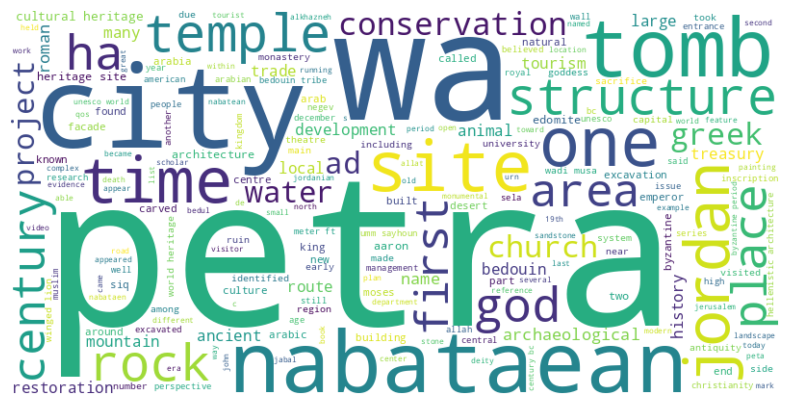

In [ ]:
wonder_name = input("Enter the name of the wonder or place: ")
ngram_analyze_wonder(wonder_name)

Sentiment Analysis using Lexicon Based Methods

In [ ]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
# Lexicon-Based Sentiment Analysis using VADER
nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
def lexicon_based_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    return sentiment_scores

In [ ]:
def count_sentiments(text):
    sentences = sent_tokenize(text)
    positive_count = 0
    negative_count = 0
    neutral_count = 0

    for sentence in sentences:
        sentiment_scores = sid.polarity_scores(sentence)
        if sentiment_scores['compound'] >= 0.05:
            positive_count += 1
        elif sentiment_scores['compound'] <= -0.05:
            negative_count += 1
        else:
            neutral_count += 1

    return positive_count, negative_count, neutral_count

In [ ]:
# Perform Sentiment Analysis on New 7 Wonders of the world
sentiment_results = {}
for wonder, text in Wikki_Text.items():
    positive, negative, neutral = count_sentiments(text)
    sentiment_results[wonder] = {
        "Positive Sentences": positive,
        "Negative Sentences": negative,
        "Neutral Sentences": neutral
    }

sentiment_results

{'Great Wall of China': {'Positive Sentences': 79,
  'Negative Sentences': 28,
  'Neutral Sentences': 41},
 'Petra': {'Positive Sentences': 87,
  'Negative Sentences': 42,
  'Neutral Sentences': 140},
 'Colosseum': {'Positive Sentences': 79,
  'Negative Sentences': 50,
  'Neutral Sentences': 94},
 'Chichén Itzá': {'Positive Sentences': 101,
  'Negative Sentences': 35,
  'Neutral Sentences': 151},
 'Machu Picchu': {'Positive Sentences': 79,
  'Negative Sentences': 64,
  'Neutral Sentences': 103},
 'Taj Mahal': {'Positive Sentences': 75,
  'Negative Sentences': 31,
  'Neutral Sentences': 99},
 'Christ the Redeemer': {'Positive Sentences': 0,
  'Negative Sentences': 0,
  'Neutral Sentences': 1}}

Text Representation

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import spacy
from gensim.models import Word2Vec
from transformers import BertTokenizer, BertModel
import torch

In [ ]:
def analyze_wonder(wonder_name):
    # Fetch the source text
    source_text = fetch_source_text(wonder_name)

    # Preprocess the text
    text = re.sub(r'\W+', ' ', source_text.lower())  # Simple text cleaning

    # 1. Bag of Words (BoW)
    def compute_bow(text):
        vectorizer = CountVectorizer()
        bow_matrix = vectorizer.fit_transform([text])
        bow_feature_names = vectorizer.get_feature_names_out()
        bow_counts = bow_matrix.toarray()[0]
        bow_df = pd.DataFrame(list(zip(bow_feature_names, bow_counts)), columns=['Term', 'Count'])
        bow_df = bow_df.sort_values(by='Count', ascending=False)
        return bow_df

    # Display Bag of Words results
    bow_df = compute_bow(source_text)
    print("Top Bag of Words Terms:")
    display(bow_df.head(10))

    # 2. TF-IDF
    def compute_tfidf(text):
        vectorizer = TfidfVectorizer()
        tfidf_matrix = vectorizer.fit_transform([text])
        feature_names = vectorizer.get_feature_names_out()
        tfidf_scores = dict(zip(feature_names, tfidf_matrix.toarray()[0]))
        tfidf_df = pd.DataFrame(list(tfidf_scores.items()), columns=['Term', 'TF-IDF'])
        tfidf_df = tfidf_df.sort_values(by='TF-IDF', ascending=False)
        return tfidf_df

    # Display TF-IDF results
    tfidf_df = compute_tfidf(source_text)
    print("Top TF-IDF Terms:")
    display(tfidf_df.head(10))

    # 3. Word Embeddings - Word2Vec
    def compute_word2vec(text):
        words = [text.split()]  # Word2Vec expects a list of tokenized sentences
        model = Word2Vec(words, vector_size=100, window=5, min_count=1, workers=4)
        word_vectors = {word: model.wv[word] for word in model.wv.index_to_key}
        return word_vectors

    word_vectors = compute_word2vec(text)
    print(f"Word2Vec Embedding for a sample word 'taj': {word_vectors.get('taj', 'Word not in vocabulary')}")

    # 4. Word Embeddings - BERT
    def compute_bert_embeddings(text):
        tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
        model = BertModel.from_pretrained('bert-base-uncased')

        inputs = tokenizer(text, return_tensors='pt', truncation=True, max_length=512)
        outputs = model(**inputs)

        embeddings = outputs.last_hidden_state.mean(dim=1).squeeze().detach().numpy()
        return embeddings

    bert_embeddings = compute_bert_embeddings(source_text)
    print("BERT Embeddings shape:", bert_embeddings.shape)
    print("Sample BERT Embeddings:", bert_embeddings[:10])

In [ ]:
wonder_name = input("Enter the name of the wonder or place: ")
analyze_wonder(wonder_name)

Enter the name of the wonder or place: Taj Mahal
Top Bag of Words Terms:


,Term,Count
1338,the,561
953,of,240
144,and,159
706,in,124
1364,to,85
1476,with,76
746,is,71
282,by,62
1443,wa,57
958,on,53


Top TF-IDF Terms:


,Term,TF-IDF
1338,the,0.813763
953,of,0.348134
144,and,0.230639
706,in,0.179869
1364,to,0.123297
1476,with,0.110242
746,is,0.102990
282,by,0.089935
1443,wa,0.082682
958,on,0.076880


Word2Vec Embedding for a sample word 'taj': [-3.6319375e-02  3.8083456e-02  9.4864322e-03 -1.1447559e-02
  6.1592343e-03 -7.2313920e-02  1.6617268e-02  7.3403068e-02
 -2.7790831e-02 -3.7932418e-02 -5.6811403e-03 -4.8191227e-02
 -3.0691696e-02  2.4749599e-02  1.6528942e-02 -1.8022574e-02
  3.6529444e-02 -2.2291886e-02 -8.7543819e-03 -8.9051232e-02
  3.6714591e-02  1.7485108e-02  3.9992753e-02 -1.0321359e-02
  5.0278773e-05  1.1932618e-02 -3.9698873e-02 -1.1092094e-02
 -2.4724526e-02  8.5030589e-03  6.4027689e-02  1.1778838e-02
  1.9907081e-02 -4.6092197e-02 -1.7404063e-03  3.7618909e-02
  3.4479820e-03 -2.7777122e-02 -2.0370984e-02 -6.3324332e-02
  8.1607904e-03 -2.3460135e-02  1.4356050e-03 -1.8135763e-05
  2.6501736e-02 -1.1747801e-02 -1.6095677e-02 -9.8171448e-03
  3.3428922e-02  2.6445141e-02  2.2728534e-02 -2.9252892e-02
 -1.7319757e-02 -2.7049759e-03 -2.0925499e-02  2.7518857e-03
  3.8985308e-02 -1.4213886e-02 -4.8182201e-02  2.1079091e-02
  1.9253472e-02  6.4388923e-03  7.4738399

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning:

`clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884



model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

BERT Embeddings shape: (768,)
Sample BERT Embeddings: [-0.26259536  0.18674943  0.10213923 -0.43663096  0.35672784 -0.11094189
  0.16097519  0.30798966  0.07398547 -0.17288888]


Topic Modeling: Non Negative Matrix Factorization (NMF)
: Identify topics within the text.

In [ ]:
import pandas as pd
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
import spacy

In [ ]:
def perform_topic_modeling(text, num_topics=2):
    cleaned_text = re.sub(r'\W+', ' ', text.lower())
    vectorizer = CountVectorizer(stop_words='english')
    doc_term_matrix = vectorizer.fit_transform([cleaned_text])

    # Latent Dirichlet Allocation
    lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda.fit(doc_term_matrix)

    # NMF
    nmf = NMF(n_components=num_topics, random_state=42)
    nmf.fit(doc_term_matrix)

    terms = vectorizer.get_feature_names_out()

    print("\nLDA Topics:")
    for idx, topic in enumerate(lda.components_):
        print(f"Topic {idx + 1}:")
        print([terms[i] for i in topic.argsort()[-5:]])

    print("\nNMF Topics:")
    for idx, topic in enumerate(nmf.components_):
        print(f"Topic {idx + 1}:")
        print([terms[i] for i in topic.argsort()[-5:]])

Entity Extraction

In [ ]:
def perform_named_entity_recognition(text):
    nlp = spacy.load("en_core_web_sm")
    doc = nlp(text)

    entities = [(ent.text, ent.label_) for ent in doc.ents]

    print("\nNamed Entities:")
    if entities:
        for entity in entities:
            print(f"Entity: {entity[0]}, Type: {entity[1]}")
    else:
        print("No named entities found.")

In [ ]:
def analyze_wonder_topics(wonder_name):
    # Fetch the source text
    source_text = fetch_source_text(wonder_name)

    # Perform topic modeling
    perform_topic_modeling(source_text)

    # Perform named entity recognition
    perform_named_entity_recognition(source_text)

In [ ]:
wonder_name = input("Enter the name of the wonder or place: ")
analyze_wonder_topics(wonder_name)

Enter the name of the wonder or place: Petra


/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:129: RuntimeWarning:

invalid value encountered in sqrt




LDA Topics:
Topic 1:
['tomb', 'site', 'city', 'wa', 'petra']
Topic 2:
['tomb', 'site', 'city', 'wa', 'petra']

NMF Topics:
Topic 1:
['tomb', 'site', 'city', 'wa', 'petra']
Topic 2:
['open', 'ruin', 'different', 'bedul', 'hellenistic']

Named Entities:
Entity: arabic, Type: NORP
Entity: greek rock, Type: LOC
Entity: nabataean, Type: NORP
Entity: raqm, Type: ORG
Entity: jordan, Type: GPE
Entity: 7, Type: CARDINAL
Entity: a early a 7000, Type: DATE
Entity: nabataeans, Type: NORP
Entity: arab, Type: NORP
Entity: the 4th century, Type: DATE
Entity: petra, Type: ORG
Entity: the second century, Type: DATE
Entity: nabataeans, Type: NORP
Entity: nabataeans, Type: NORP
Entity: rainwater harvesting, Type: PERSON
Entity: petra, Type: ORG
Entity: the 1st century, Type: DATE
Entity: nabataean, Type: NORP
Entity: an estimated 20000, Type: CARDINAL
Entity: 106, Type: CARDINAL
Entity: petras, Type: PERSON
Entity: 363, Type: CARDINAL
Entity: christian, Type: NORP
Entity: islamic, Type: NORP
Entity: 181

Streamlit App

In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 52.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


In [ ]:
%%writefile app.py
import streamlit as st

# Streamlit app
st.title("New 7 Wonders of the World Text Analysis")

# Input URL for Wikipedia page of The New 7 Wonders of the World
url_input = st.text_input("Enter the URL for the Wikipedia page of The New 7 Wonders of the World:", "")

if url_input:
    if st.button("Initiate Summary Making"):

        # Initialize Wikipedia API with the correct user agent
        user_agent = ("Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3")
        wiki_wiki = wikipediaapi.Wikipedia(language='en', user_agent=user_agent)

        # Send a GET request to the URL and parse the HTML content of the page
        response = requests.get(url_input)
        soup = BeautifulSoup(response.content, 'html.parser')

        # Find the table in the Winners section and initialize an empty list to store the names of the wonders
        table = soup.find('table', {'class': 'wikitable'})

        wonders_dict = {}

        # Iterate over each row in the table (excluding the header row)
        for row in table.find_all('tr')[2:]:
            cell = row.find_all('td')[0]
            wonder_name = cell.get_text(strip=True)
            wonder_url = "https://en.wikipedia.org" + cell.find('a')['href']
            wonders_dict[wonder_name] = wonder_url

        # Reference summaries (Manually added)
        reference_summaries = {
            "Great Wall of China": "The Great Wall of China is a series of fortifications built across the historical northern borders of ancient Chinese states and Imperial China to protect against various nomadic groups from the Eurasian Steppe. The wall stretches from Liaodong in the east to Lop Lake in the west, from the present-day Sino-Russian border in the north to the Tao River in the south, spanning 21,196 km (13,170.70 mi) in total. The Chinese character for city or fortress is a phonosemantic compound, and the longer name Ten-Thousand Mile Long Wall came from Sima Qian's description. The Great Wall became standard in English and French by the 19th century. The Chinese were familiar with wall-building techniques by the Spring and Autumn period (8th-5th century BC). The wall was built to withstand attacks from small arms like swords and spears.During the Ming era (14th century), the Great Wall concept was revived to keep nomadic tribes out by constructing walls along China's northern border. The wall followed the desert's southern edge instead of incorporating the Yellow River bend. The Liaodong Wall enclosed the agricultural heartland of Liaodong province, protecting it against potential incursions. Towards the end of the Ming dynasty, the Great Wall helped defend against the Manchu invasion around 1600. The wall is mentioned in travelogues and associated with legends in the Quran. After China's defeat in the Opium Wars, the Great Wall became a tourist attraction. In 2012, National Cultural Heritage Administration concluded that remaining Great Wall sites include 10,051 sections, 1,764 ramparts or trenches, 29,510 buildings, and 2,211 fortifications or passes, spanning a total length of 21,196 km (13,170.70 mi).The Ming dynasty's Great Wall cut through Ordos Desert to Yellow River's eastern edge. Outer Great Wall extends along Inner Mongolia border with Shanxi into Hebei province, while inner Great Wall runs southeast from Piantou Pass for about 400 km (250 mi). Badaling Great Wall near Zhangjiakou is most famous stretch, being first section opened to public. Shanhai Pass at Bohai Gulf's edge is considered traditional end of Great Wall. In 2009, 180 km of previously unknown sections of Ming Wall were discovered using infrared range finders and GPS devices. About 22% of Ming Great Wall has disappeared, and 1,961 km (1,219 mi) of wall have vanished. It is estimated that more than 60 km (37 mi) of wall in Gansu province may disappear in next 20 years due to erosion from sandstorms. In some places, wall's height has been reduced from over 5 m (16 ft 5 in) to less than 2 m (6 ft 7 in).The Great Wall of China cannot be seen by naked human eye from moon, a myth thoroughly debunked but still ingrained in popular culture. The apparent width of Great Wall would be same as human hair viewed from 3 km (2 mi) away. A Chinese-American astronaut took a photograph from International Space Station showing wall, reporting that from an orbit between 160 and 320 km (100 and 200 mi), Great Wall is visible to naked eye.",
            "Petra": "Petra, one of the New Seven Wonders of the World and a UNESCO World Heritage Site, is also known as the Rose City due to the color of the sandstone from which it is carved. The area around Petra has been inhabited since as early as 7000 BC and was settled by the Nabataeans, a nomadic Arab people, in the 4th century BC. Petra flourished in the 1st century AD when the Al-Khazneh structure, possibly the mausoleum of Nabataean King Aretas IV, was constructed. The city was hit hard by the COVID-19 pandemic but began to recover, reaching 905,000 visitors in 2022. By 7000 BC, some of the earliest recorded farmers had settled in Beidha, a pre-pottery Neolithic settlement just north of Petra. Bronze Age Petra is listed in Egyptian campaign accounts and the Amarna letters as Pel, Sela, or Seir. An old theory held that Petra might be identified with a place called Sela in the Hebrew Bible. The passage in Diodorus Siculus XIX.94-97 describes the expedition Antigonus sent against the Nabataeans in 312 BC, implying no town existed there at the time. It is possible that the city was part of the nation of Edom. Another Roman road was constructed at the site. In 130 AD, Hadrian visited the former Nabataean capital, giving it the name Hadrian Petra Metropolis, imprinted on his coin. The area from Petra to Wadi Mujib, the Negev, and the Sinai Peninsula were annexed into the province of Palaestina Salutaris. During the Byzantine period, Petra declined rapidly under Roman rule, largely due to the revision of sea-based trade routes. In 363, an earthquake destroyed many buildings and crippled the vital water management system. The last reference to Petra comes from the “Spiritual Meadow” of John Moschus, written in the first decade of the 7th century. The first European to describe Petra was the Swiss traveler Johann Ludwig Burckhardt during his travels in 1812. The first accurate drawing of Petra in 1828 was made by Léon de Laborde. Local folklore says it was created by the wand of Moses when he struck the rock to bring forth water for the Israelites. The Bedul Bedouin, once inhabitants of Petra, were relocated by the Jordanian government to the nearby settlement of Umm Sayhoun in the 1980s. Bedul Bedouin are believed to have adopted Islam later in their history, possibly with Jewish or Nabataean origins. Petra is known primarily for its Hellenistic architecture. The facades of the tombs in Petra are commonly rendered in Hellenistic style, reflecting the diverse cultures with which the Nabataeans traded, all of which were influenced by Greek culture. Perhaps the best example of this style is seen in the Treasury, which is 24 meters (79 ft) wide and 37 meters (121 ft) tall. The Monastery is 45 meters (148 ft) tall and 50 meters (160 ft) wide. The Treasury is the most elaborate ruin, popularly known as Al-Khazneh, hewn into the sandstone cliff. The face of the structure is marked by hundreds of bullet holes made by local Bedouin tribes hoping to dislodge riches rumored to be hidden within it. The Petra Pool and Garden Complex is a series of structures within the city center. The High Place of Sacrifice is perched atop Jebel Madbah mountain. The tomb of the prophet Aaron is believed to be located in Petra, which is a sacred site for Muslims. In honor of this, a goat was sacrificed annually, and other rituals took place there, including the burning of frankincense. Petra was the capital of the Nabataean Kingdom and the center of their caravan trade. The Nabataeans worshipped Arab gods and goddesses during the pre-Islamic era, as well as a few of their deified kings. A stele dedicated to Qos-Allah (Qos is Allah) is found at Petra. Allah, El, and Allat were gods and goddesses with regional references to Al-Uzza, Baal, and Manat. Allat is also found in Sinai in South Arabian language. Recently, Petra has been put forward as the original direction of Muslim prayer (the Qibla) by some, suggesting that the earliest mosques faced Petra, not Jerusalem or Mecca. Petra is the largest village in the region, inhabited largely by the Layathnah Bedouin. The Wadi Musa, or Wadi of Moses, is the Arabic name for the narrow valley at the head of which Petra is sited. The area has a semi-arid climate with an average annual temperature of 15.5°C (59.9°F). On December 6, 1985, Petra was designated a World Heritage Site. In a popular poll in 2007, it was also named one of the New Seven Wonders of the World. In 2011, following an 11-month project planning phase, the Petra Development and Tourism Region Authority published a strategic master plan. UNESCO and ICOMOS recently collaborated to publish their first book on human and natural threats to the sensitive World Heritage Site, choosing Petra as its first and most important example of a threatened landscape. The presentation “Tourism and Archaeological Heritage Management at Petra: Driver to Development or Destruction” (2012) was the first in a series to address the deteriorating buildings, city sites, and regions. An increasing number of Nabataean cultural heritage sites are being exposed to environmental impacts. A central issue is the management of water impacting the built heritage and the rock-hewn facades. In recent years, different conservation campaigns and projects have been established at the cultural heritage site of Petra. In 1845, British poet John William Burgon won Oxford University’s Newdigate Prize for his poem “Petra,” containing the description “… a rose-red city half as old as time.” Petra appeared in the novel “Bartleby Left Behind” (Left Behind series), “Appointment with Death,” “The Eagle in the Sand,” “The Red Sea Sharks” (the nineteenth book in the Adventures of Tintin series). Petra is central to Netflix’s first Arabic original series “Jinn,” a young adult supernatural drama about the djinn in the ancient city of Petra. A fictionalized version of Petra appears as a playable arena in the video game Overwatch, added in a 2018 update. The UNESCO World Heritage Centre refers to Petra as the Kingdom of Sifu. The Bedouin tribe of Petra was photographed between 1986 and 2003, and these photographs were retrieved in 2008. The people of the West are mentioned in the Weilue by Yu Huan. The American Center of Research is located in California, USA. It is the largest research center in the world and centers of research in the United States. It is the first of its kind in the country since it was founded in 1903.",
            "Christ the Redeemer": "Christ the Redeemer (Portuguese: Cristo Redentor) is an iconic Art Deco statue of Jesus Christ in Rio de Janeiro, Brazil. Designed by French-Polish sculptor Paul Landowski and built by Brazilian engineer Heitor da Silva Costa, with assistance from French engineer Albert Caquot, the statue’s face was created by Romanian sculptor Gheorghe Leonida. Constructed between 1922 and 1931, the statue stands 30 meters (98 feet) tall, excluding its 8-meter (26 feet) pedestal, and its arms stretch 28 meters (92 feet) wide. Made of reinforced concrete and soapstone, it is located at the peak of the 700-meter (2,300 feet) Corcovado mountain in the Tijuca National Park, overlooking Rio de Janeiro. Christ the Redeemer is a symbol of Christianity worldwide and a cultural icon of both Rio de Janeiro and Brazil. It was voted one of the New 7 Wonders of the World in 2007.",
            "Machu Picchu": "Machu Picchu, a 15th-century Inca citadel, is located in the Eastern Cordillera of southern Peru on a mountain ridge at 2,430 meters (7,970 ft). The Inca civilization had no written language, and after the first encounter by Spanish soldier Baltasar Ocampo, no Europeans are recorded to have visited the site from the late 16th century until the 19th century. The site is situated on a narrow saddle between two mountain peaks, Machu Picchu and Huayna Picchu. In Quechua, “machu” means old or old person, and “wayna” means young, while “pikchu” refers to a summit, peak, or pyramid. The name of the site is often translated as “old mountain” or “old peak.” Studies show that, according to their skeletal remains, most people who lived there were immigrants from diverse backgrounds. The estate belonged to Pachacutec, and religious specialists and temporary specialized workers (mayocs) lived there permanently. During harsher seasons, staffing was reduced to a few hundred servants and a few religious specialists focused solely on maintenance. Much of the farming at Machu Picchu was done on its hundreds of andenes (man-made terraces). These terraces were a work of engineering, built to ensure good drainage and soil fertility while also protecting the mountain itself from erosion and landslides. The terrace farming area makes up only about 4.9 hectares (12 acres) of land. The site may have been rediscovered and plundered in 1867 by a German businessman, Augusto Berns. Over the centuries, the surrounding jungle overgrew the site, and few outside the immediate area knew of its existence. The name believed to be originally given to the site by locals was found by explorer Agustín Lizárraga, who wrote the date 1902 in charcoal on one of the walls of the Temple of the Three Windows. In 1952, Hiram Bingham claimed to have found the site himself. Though Bingham was not the first to visit the ruins, he is considered the scientific discoverer who brought Machu Picchu to international attention. Bingham rediscovered and correctly identified the site of the old Inca capital, Vitcos (then called Rosaspata), and the nearby temple of Chuquipalta. In 1964, Gene Savoy further explored the ruins at Espiritu Pampa and revealed the full extent of the site, identifying it as Vilcabamba. Bingham returned to Machu Picchu in 1912 under the sponsorship of Yale University and National Geographic, with the full support of Peruvian President Augusto Leguía. The expedition undertook a four-month clearing of the site with local labor, expedited with the support of the prefect of Cusco. During his study, Bingham carried various artifacts back to Yale. In 1983, UNESCO designated Machu Picchu a World Heritage Site, describing it as a masterpiece of art, urbanism, architecture, and engineering, and a unique testimony to the Inca civilization. The site is also a habitat for more than 420 bird species, notably the cock-of-the-rock and the Andean condor. UNESCO considered including Machu Picchu on its list of World Heritage in Danger in 2017 but ultimately decided against it. In January 2010, severe flooding caused by El Niño trapped over 4,000 people and disrupted access to the site. Stricter entrance regulations were introduced in July 2011, limiting the number of daily visitors to 2,500 to the citadel and 400 to Huayna Picchu. Machu Picchu lies in the Southern Hemisphere, 13.111 degrees south of the equator. It is located 80 kilometers (50 miles) northwest of Cusco on the crest of the mountain. The location of the city was a military secret, and its deep precipices and steep mountains provided natural defense. Machu Picchu and other sites in the area are built over earthquake faults. According to research conducted in 2019, this may not be a coincidence. Research suggests that the earthquake faults provided building material for the site, with large amounts of already fractured rock readily available. Located in the urban sector are the primary archaeological treasures and tourist attractions: the Intihuatana, the Temple of the Sun, and the Popular District or Residential District, where the lower-class people lived. The Royal Mausoleum is a carved statue with a vaulted interior and carved drawings. The Guardhouse is a three-sided building with one of its long sides opening onto the terrace of the Ceremonial Rock. The Intihuatana stone is a ritual stone designed to point directly at the sun during the winter solstice. The Inca believed the stone held the sun in its place along its annual path in the sky. Inti Machay is a special cave used to observe the royal feast of the sun. Inti Machay is located on the eastern side of Machu Picchu, just north of the Condor Stone. Many of the caves surrounding this area were prehistorically used as tombs, yet there is no evidence that Machay was a burial ground. Disputes over cultural artifacts arose when, in 1912, 1914, and 1915, Bingham removed thousands of artifacts from Machu Picchu. Yale kept the artifacts until 2012, arguing that Peru lacked the infrastructure and systems to care for them. Machu Picchu may have been intentionally built on fault lines to provide natural drainage and a source of fractured stone for construction. The Inca civilization was an empire of fractured rock. The section of the mountain where Machu Picchu was built provided various challenges that the Inca solved with local materials. The Inca Trail is considered the most famous hike in South America by Lonely Planet, attracting thousands of tourists each year. The people of Machu Picchu were connected to long-distance trade, as shown by non-local artifacts found at the site. The most popular option is the train journey from Cusco or Ollantaytambo. Machu Picchu featured prominently in the film “The Motorcycle Diaries” (2004), based on the memoirs of Marxist revolutionary Che Guevara. It was the first time a major Hollywood studio filmed on site. Five hundred indigenous people were hired as extras for the film “Secret of the Incas” (1954).",
            "Chichén Itzá": "Chichén Itzá, often spelled Chichen Itza in English and traditional Yucatec Maya, was a large pre-Columbian city built by the Maya people of the Terminal Classic period. The site exhibits a multitude of architectural styles reminiscent of styles seen in central Mexico and of the Puuc and Chenes styles of the northern Maya lowlands. Chichén Itzá is located in the eastern portion of Yucatán state in Mexico. The name, dating to the Late Classic period, is recorded both in the Book of Chilam Balam de Chumayel and in hieroglyphic texts in the ruins. Archaeologists in the late 1980s suggested that, unlike previous Maya polities of the Early Classic, Chichén Itzá may not have been governed by an individual ruler or a single dynastic lineage. Instead, the city’s political organization could have been structured by a multepal system, characterized by rulership through a council composed of members of elite ruling lineages. This theory was popular in the 1990s, but in recent years, the research that supported the concept has been called into question, if not discredited. The earliest hieroglyphic date discovered at Chichén Itzá is equivalent to 832 AD, while the last known date was recorded in the Osario Temple in 998. However, it was toward the end of the Late Classic and into the early part of the Terminal Classic that the site became a major regional capital, centralizing and dominating political, sociocultural, economic, and ideological life in the northern Maya lowlands. Archaeological data now indicates Chichén Itzá declined as a regional center by 1100, before the rise of Mayapan. After Chichén Itzá’s elite activity ceased, the city may not have been abandoned. When the Spanish arrived, they found a thriving local population. The relatively high population density in the region was a factor in the conquistadors’ decision to locate a capital there. The Cenote Sagrado remained a place of pilgrimage. Chichén Itzá entered the popular imagination in 1843 with the book “Incidents of Travel in Yucatan” by John Lloyd Stephens, with illustrations by Frederick Catherwood. The Spanish crown later issued a land grant that included Chichén Itzá, and by 1588 it was a working cattle ranch. In 1875, Augustus Le Plongeon excavated a statue of a figure on its back, knees drawn up, upper torso with a plate on its stomach. In 1913, the Carnegie Institution accepted the proposal of archaeologist Sylvanus G. Morley and committed to conducting long-term archaeological research at Chichén Itzá. The Mexican Revolution and the following government instability, as well as World War I, delayed the project by a decade. In 1926, the Mexican government charged Edward Thompson with theft, claiming he stole artifacts from the Cenote Sagrado and smuggled them out of the country. Chichén Itzá is one of the largest Maya cities, with the relatively densely clustered architecture of the site core covering an area of at least 5 square kilometers. The architecture encompasses a number of styles, including the Puuc and Chenes styles of the northern Yucatán Peninsula. The buildings were connected by a dense network of paved causeways called sacbeob. The Temple of Kukulcán (El Castillo) is the temple of a Maya feathered serpent deity similar to the Aztec Quetzalcoatl. The Puuc-style architecture is concentrated in the Old Chichen area and also the earlier structures in the Nunnery Group. Mesoamerican cultures periodically superimposed larger structures over older ones, and the Temple of Kukulcán is one such example. In the mid-1930s, the Mexican government sponsored an excavation of the temple. After several false starts, they discovered a staircase under the north side of the pyramid. By digging from the top, they found another temple buried below the current one. Inside the temple chamber was a Chac Mool statue and a throne in the shape of a jaguar, painted red and with spots made of jade. At one end of the Great Ball Court is the North Temple, also known as the Temple of the Bearded Man (Templo del Hombre Barbado). At the south end is another, much bigger temple, but in ruins. Built into the east wall are the Temple of the Jaguar. The Platform of the Eagle and the Jaguar (Plataforma de Águilas y Jaguares) is immediately to the east of the Great Ballcourt. It is built in a combination of Maya and Toltec styles. The Temple of the Table is located north of El Castillo, between it and the Cenote Sagrado. The Yucatán Peninsula is a limestone plain with no rivers or streams. The region is pockmarked with natural sinkholes called cenotes, which expose the water table to the surface. The Temple of the Warriors complex consists of a large stepped pyramid fronted and flanked by rows of carved columns depicting warriors. This complex is analogous to Temple B at the Toltec capital of Tula and indicates some form of cultural contact between the two regions. At the southeast corner of the Temple of the Warriors is a rectangular structure decorated with carvings of people or gods, as well as animals and serpents. The Northeast Column Temple also covers a small marvel of engineering: a channel that funnels all the rainwater from the complex some 40 meters (130 ft) away to a rejollada, a former cenote. The Temple of Xtoloc is a recently restored temple outside the Osario platform. It overlooks the other large cenote at Chichén Itzá, named after the Maya word for iguana. The temple contains a series of pilasters carved with images of people, as well as representations of plants, birds, and mythological scenes. The Central Group (Las Monjas) is one of the more notable structures at Chichén Itzá. It is a complex of Terminal Classic buildings constructed in the Puuc architectural style. One building is half-standing, named La Casa del Venado (House of the Deer). Another is a small temple known as La Iglesia (The Church), decorated with elaborate masks. Old Chichen, or Chichén Viejo in Spanish, is the name given to a group of structures to the south of the central site, where most of the Puuc-style architecture of the city is concentrated. This section of the site has been closed to tourism for years while archaeological excavation and restoration were ongoing and is planned to reopen to visitors in 2024. In the caves, a large selection of ancient pottery and idols may be seen still in the positions where they were left in pre-Columbian times. Chichén Itzá is one of the most visited archaeological sites in Mexico. In 2017, it was estimated to have received 2.1 million visitors. Tourism has been a factor at the site for more than a century. John Lloyd Stephens popularized the Maya Yucatán in the public imagination with his book “Incidents of Travel in Yucatan,” which inspired many to make a pilgrimage to Chichén Itzá. In the mid-1920s, Barbachano Peon persuaded Edward Thompson to sell 5 acres (20,000 m²) next to Chichén Itzá for a hotel. In 1930, the Mayaland Hotel opened just north of the Hacienda Chichén, which had been taken over by the Carnegie Institution. In 1944, Barbachano Peon purchased all of Chichén Itzá from the heirs of Edward Thompson. In 1972, Mexico enacted the Ley Federal sobre Monumentos y Zonas Arqueológicas, Artísticas e Históricas (Federal Law over Monuments and Archaeological, Artistic, and Historic Sites). Today, several thousand people show up to see the light-and-shadow effect on the Temple of Kukulcán. In 2007, Chichén Itzá’s Temple of Kukulcán (El Castillo) was named one of the New Seven Wonders of the World after a worldwide vote. INAH, which manages the site, has closed a number of monuments to public access. The state of Yucatán purchased the land upon which the most recognized monuments rest from owner Hans Juergen Thies Barbachano. UNESCO has a page about Chichén Itzá as a World Heritage Site. The ancient observatory page on Chichén Itzá has been reconstructed in 3D. Archaeological documentation for Chichén Itzá has been created by the nonprofit group Insight and funded by the National Science Foundation.",
            "Colosseum": "The Colosseum is an elliptical amphitheatre in the center of Rome, Italy, just east of the Roman Forum. Construction began under Emperor Vespasian in AD 72 and was completed in AD 80 under his successor and heir, Titus. It could hold an estimated 50,000 to 80,000 spectators at various points in its history, with an average audience of around 65,000. The name “Colosseum” is believed to be derived from a colossal statue of Nero, modeled after the Colossus of Rhodes. The name is a neuter Latin noun formed from the adjective “colosseus,” meaning gigantic. By the year 1000, the Latin name had been coined to refer to the amphitheatre from the nearby Colossus Solis. The spellings “Colosseum” and “Coliseum” are attested from the 12th and 14th centuries, respectively. Early citations for the name “Colosseum” in early modern English include the 1600 translation by Philemon Holland of the “Urbis Romae Topographia” of Bartolomeo Marliani, which he used in preparing his translation of Livy’s “Ab Urbe Condita Libri.” After Nero’s suicide, the statue was remodeled by his successor into the likeness of Helios (Sol) or Apollo, the sun god, by adding the appropriate solar crown. The Colosseum was built on the site of Nero’s lake in the 2nd century BC. The site was devastated by the Great Fire of Rome in AD 64, after which Nero seized much of the area to add to his personal domain. He built the grandiose Domus Aurea, in front of which he created an artificial lake surrounded by pavilions, gardens, and porticoes. The lake was filled in, and the land was reused as the location for the new Flavian Amphitheatre. Construction of the Colosseum began under Vespasian around AD 70-72 and was completed up to the third story by the time of his death in AD 79. The top level was finished by his son Titus in AD 80, and the inaugural games were held in AD 80 or 81. The Colosseum continued to be used for contests well into the 6th century. The arena was used for animal hunts until at least AD 523, when Anicius Maximus celebrated his consulship with some venationes, criticized by King Theodoric the Great for their high cost. By the late 6th century, a small chapel had been built into the structure of the amphitheatre, though this did not confer any particular religious significance on the building as a whole. Pope Sixtus V (1585-1590) planned to turn the Colosseum into a wool factory to provide employment for Rome’s prostitutes. In 1671, Cardinal Altieri authorized its use for bullfights, but public outcry caused the idea to be hastily abandoned. In 1749, Pope Benedict XIV endorsed the view that the Colosseum was a sacred site where early Christians had been martyred. Later popes initiated various stabilization and restoration projects, removing the extensive vegetation that had overgrown the structure. The Colosseum was illuminated in gold in November 2012 following the abolition of capital punishment in the American state of Connecticut in April 2012. Since that time, as a gesture against the death penalty, the local authorities of Rome change the color of the Colosseum’s nighttime illumination from white to gold whenever a person condemned to the death penalty anywhere in the world has their sentence commuted or is released. The surviving part of the outer wall’s monumental façade comprises three superposed stories surmounted by a podium on which stands a tall attic, both of which are pierced by windows interspersed at regular intervals. The northern main entrance was reserved for the Roman emperor and his aides, while the other three axial entrances were most likely used by the elite. The amphitheatre was ringed by eighty entrances at ground level, 76 of which were used by ordinary spectators. Interior seating, according to the Codex-Calendar of 354, could accommodate 87,000 people, although modern estimates put the figure at around 50,000. Spectators were given tickets in the form of numbered pottery shards, which directed them to the appropriate section and row. They accessed their seats via vomitoria (singular: vomitorium), passageways that opened into a tier of seats from below or behind. These quickly dispersed people into their seats and, upon conclusion of the event or in an emergency evacuation, could permit their exit within only a few minutes. The hypogeum was a two-level subterranean network of tunnels and cages beneath the arena where gladiators and animals were held before contests began. It comprised a wooden floor covered by sand and included a gallery for the common poor, slaves, and women. The arena itself was 83 meters by 48 meters (272 ft by 157 ft). There is evidence for the existence of major hydraulic mechanisms, and according to ancient accounts, it was possible to flood the arena rapidly via a connection to a nearby aqueduct. However, the construction of the hypogeum at Domitian’s behest put an end to the practice of flooding and naval battles early in the Colosseum’s existence. Another major attraction was the animal hunts (venatio), which utilized a great variety of wild beasts, mainly imported from Africa and the Middle East. During lunch intervals, executions ad bestias would be staged. Those condemned to death would be sent into the arena naked and unarmed to face the beasts, which would literally tear them to pieces. Acrobats and magicians would also perform during the intervals. The Colosseum is the site of Roman Catholic ceremonies in the 20th and 21st centuries. A network of subterranean passageways that were once used for transporting wild animals and gladiators to the arena opened to the public in summer 2010. The Colosseum is generally regarded by Christians as a site of the martyrdom of a large number of believers during the persecution of Christians in the Roman Empire. Since November 1, 2017, the top two levels have been opened for guided visits. The fourth level held the marketplace, and the top fifth tier is where the poorest citizens, the plebeians, gathered and watched the shows, bringing picnics for the day-long events. The Colosseum has a wide and well-documented history of flora ever since Domenico Panaroli made the first catalog of its plants in 1643. Every Good Friday, the Pope leads a Via Crucis procession to the amphitheatre. Forty-two species have been counted today, and of the species first identified by Panaroli, 200 remain. The variation of plants can be explained by the change of climate in Rome through the centuries. The Colosseum has appeared in numerous films, artworks, and games. It is featured in films such as “Roman Holiday,” “Gladiator,” “The Way of the Dragon,” and “Jumper.” It is an open-air venue, the Stadium of Domitian, an ancient Roman stadium, and a landmark of Rome, Italy. References, bibliography, and external links include the official website, a virtual tour of the Colosseum, and a 3D model of the past and present of the site.",
            "Taj Mahal": "The Taj Mahal is an ivory-white marble mausoleum on the right bank of the river Yamuna in Agra, Uttar Pradesh, India. It was commissioned in 1631 by the fifth Mughal emperor Shah Jahan (r. 1628–1658) to house the tomb of his beloved wife Mumtaz Mahal. The tomb is the centerpiece of a 17-hectare (42-acre) complex, which includes a mosque and a guest house. The name “Taj Mahal” is of Urdu origin and is believed to be derived from Arabic and Persian, with “Taj” meaning crown and “Mahal” meaning palace. Construction started in 1632, and the mausoleum was completed in 1648, while the surrounding buildings and garden were finished five years later. The entire complex sits on a platform measuring 300 meters (980 ft) in length and 8.7 meters (28.5 ft) in height on the bank of the Yamuna river. The mausoleum building is the central structure of the entire complex. Each side of the iwan is framed with a 33-meter (108 ft) high pishtaq (vaulted archway). Four minarets flank the tomb building, one at each corner of the plinth, facing the chamfered corners. The main and smaller domes are decorated with a design resembling a lotus flower. The domes are topped by decorative finials, which are topped by a moon, a typical Islamic motif whose horns point heavenward. The dome and vault of the sandstone building are worked with tracery of incised painting to create elaborate geometric forms. The building has many lattice windows or jalis with interlocking hexagonal patterns. The gateway arches are bordered by Arabic calligraphy with passages from the Quran. The main chamber houses the false sarcophagi of Mumtaz Mahal and Shah Jahan, while the real ones are in the basement. The interior walls are about 25 meters (82 ft) high and are topped by a false interior dome decorated with a sun motif. The inlay work is a lapidary of precious and semi-precious gemstones. Mumtaz’s cenotaph is located in the exact center of the chamber on a marble base of 1.5 by 2.5 meters (4 ft 11 in by 8 ft 2 in). The cenotaphs are aligned north-south, with the head towards the north and the body laid on their sides with the face turned towards the west, facing Mecca. The original tomb in the lower level is largely undecorated, with ninety-nine names of God inscribed on the sides. The Charbagh garden, a design inspired by Persian gardens introduced to India by Babur, the first Mughal emperor, symbolizes the paradise garden (Jannah) with four rivers flowing from a central spring or mountain, separating the garden into north, west, south, and east. In the northwestern quadrant is a place that marks the site where Mumtaz Mahal was first buried before her body was moved to its final resting place inside the main chamber of the mausoleum. The Taj Mahal complex is enclosed by crenellated red sandstone walls on three sides, with the side facing the Yamuna river left open. As the Mughal Empire declined, the gardens were not maintained, and when the British Raj assumed management of the gardens, they changed the landscaping to resemble the formal lawns of London in the 19th century. The tomb complex was commissioned in 1631, and construction commenced in 1632. It is believed that more than 20,000 artisans, laborers, painters, and others were involved in the construction of the tomb. The external surface of the main tomb building and the interior of the main cenotaph chamber are veneered with white marble. The other interior surfaces and other interior buildings are lined with red sandstone coated with a red ochre for protection. The Taj Mahal complex is believed to have been completed in its entirety in 1653 at a cost estimated at the time to be around 5 million rupees, which in 2023 would be approximately 35 billion rupees (US$77.8 million). The first ceremony was held at the mausoleum by Shah Jahan on 6 February 1643, on the 12th anniversary of the death of Mumtaz Mahal. In 1983, the Taj Mahal was designated a UNESCO World Heritage Site for being the jewel of Islamic art in India and one of the universally admired masterpieces of world heritage. Since the late 20th century, the monument has been affected by environmental pollution, which has turned the tomb yellow-brown. The government of India has undertaken various restoration measures, including placing mud packs to restore the white color and replacing broken marble. The planning and structure of the Taj Mahal, from the building itself to the garden and beyond, is symbolic of Mumtaz Mahal’s mansion in the garden of paradise. The structure is decorated with colorful relief and semi-precious stones using a technique called parchin kari, symbolizing grandeur. The building appears to slightly change color depending on the time of day and the weather. This effect is due to the marble surface reacting to light and moisture, creating a magical and ever-changing visual experience. The Taj Mahal also appears in several listings of the Seven Wonders of the Modern World. The complex is open every day except Friday, from one hour before sunrise to 45 minutes before sunset. The small town to the south of the Taj, known as Taj Ganji or Mumtazabad, was initially constructed with caravanserais, bazaars, and markets. A more credible theory for the origin of the black mausoleum was demonstrated in 2006 by archaeologists who reconstructed part of the pool in the Mehtab Bagh. Some stories claim that those involved in the construction signed contracts committing themselves to have no part in any similar design. No evidence exists for the claim that Lord Bentinck, Governor-General of India in the 1830s, planned to demolish the Taj Mahal and auction off the marble. In August 2017, the Archaeological Survey of India declared that there was no evidence to suggest the monument ever housed a temple. The theory that it was a temple was first promoted by Henry George Keene in 1879. Keene went by a translation of a Spanish work, “Itinerario,” the travel of Fray Sebastian Manrique (1629–1643). Another theory that a Frenchman named Austin of Bordeaux designed the Taj Mahal was revived by Father Hosten and discussed again by E. B. Havell."
        }

        scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)

        results = []

        for wonder, url in wonders_dict.items():
            normalized_wonder = remove_accents(wonder)
            page = wiki_wiki.page(normalized_wonder.replace(' ', '_'))

            cleaned_text = clean_text(page.text)
            normalized_text = normalize_text(cleaned_text)

            if page.exists():
                wikipedia_summary = summarize_large_text(normalized_text, chunk_size=2000, max_length=150, min_length=50)
                wikipedia_summary = clean_summary(wikipedia_summary)
            else:
                wikipedia_summary = "Page not found"

            reference_summary = reference_summaries.get(wonder, "No reference summary available")

            if wikipedia_summary != "Page not found":
                scores = scorer.score(wikipedia_summary, reference_summary)
                rouge1 = scores['rouge1'].fmeasure
                rouge2 = scores['rouge2'].fmeasure
                rougeL = scores['rougeL'].fmeasure
            else:
                rouge1, rouge2, rougeL = 0.0, 0.0, 0.0

            results.append({
                'Wonder': wonder,
                'Source Text': wrap_text(page.text[:3000]),
                'Wikipedia Summary': wrap_text(wikipedia_summary),
                'Reference Summary': wrap_text(reference_summary),
                'ROUGE-1': rouge1,
                'ROUGE-2': rouge2,
                'ROUGE-L': rougeL
            })

        # Create DataFrame for the results
        df = pd.DataFrame(results)

        # Display the DataFrame with borders using tabulate
        st.write(tabulate(df, headers='keys', tablefmt='grid'))

Writing app.py


In [ ]:
!pip install pyngrok

In [ ]:
from pyngrok import ngrok
ngrok.set_auth_token("2mLTdpcJPojdjIY5hz7F0Kr0Tkh_81zdWR9UCvvZPD8AbjKm8")

In [ ]:
!streamlit run app.py &>/content/logs.txt &

In [ ]:
public_url = ngrok.connect(addr='8501')
print(public_url)

NameError: name 'ngrok' is not defined